
# Introduction

Le carcinome épidermoïde de la cavité buccale et du pharynx représente un défi de santé majeur, nécessitant des stratégies de diagnostic et de traitement efficaces. Dans ce contexte, l'utilisation de l'intelligence artificielle (IA) et de l'apprentissage automatique offre des perspectives prometteuses pour améliorer la prise en charge des patients. Ce projet vise à exploiter les données cliniques et génomiques disponibles pour prédire les issues des patients atteints de ce type de cancer, avec pour objectif ultime d'améliorer les résultats cliniques et la qualité de vie des patients.

# Presentation des colonnes de la dataset

- Assembly Version : La version de l'assemblage génomique utilisée pour aligner les données.
- Chromosome: Le numéro de chromosome où la mutation est située.
- Chromosome start: La position de début de la mutation sur le chromosome.
- Chromosome end: La position de fin de la mutation sur le chromosome.
- Mutation ID: L'identifiant unique de la mutation.
- Mutation type: Le type de mutation, tel que substitution, insertion, délétion, etc.
- Segment mean: La moyenne du segment où la mutation est située.
- Analysis ID: L'identifiant de l'analyse.
- Donor ID: L'identifiant unique du donneur.
- Sex_x: Le sexe du donneur.
- Age at diagnosis_x: L'âge du donneur au moment du diagnostic.
- ICD-10_x: Le code de la Classification internationale des maladies (CIM-10) associé au cancer.
- Specimen ID_x: L'identifiant de l'échantillon.
- Analyzed sample ID: L'identifiant de l'échantillon analysé.
- Age at last follow-up: L'âge du donneur lors du dernier suivi.
- Interval of last follow-up (days): L'intervalle en jours depuis le dernier suivi.
- Donor vital status: Le statut vital du donneur (décédé ou vivant).
- Survival time (days): Le temps de survie en jours.
- Donor tumour staging system at diagnosis: Le système de stadification de la tumeur utilisé lors du diagnostic.
- Specimen ID_y: L'identifiant de l'échantillon de type y.
- Specimen type_y: Le type de spécimen de type y.
- Tumour confirmed_y: La confirmation de la tumeur de type y.
- Specimen notes: Les notes associées à l'échantillon.
- Sample ID: L'identifiant de l'échantillon.
- Sample type_y: Le type d'échantillon de type y.
- Sample notes: Les notes associées à l'échantillon.

# Objectif

L'objectif principal de ce projet est de développer des modèles prédictifs précis pour estimer le temps de survie, le risque de récidive et le statut vital des patients atteints de carcinome épidermoïde de la cavité buccale et du pharynx. En combinant des techniques avancées d'IA avec une analyse approfondie des données cliniques et génomiques, nous cherchons à identifier les facteurs prédictifs clés et à personnaliser les stratégies de prise en charge pour chaque patient. En fournissant des insights précieux aux cliniciens, ce projet vise à améliorer les décisions médicales et les résultats cliniques dans la lutte contre ce type de cancer.

# IAE

Les techniques d'Interprétabilité de l'Apprentissage Automatique sont utilisées pour chaque modèle établie afin de générer des explications interprétables pour les prédictions.


# L'analyse exploratoire des données (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
import seaborn as sns
import os

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\school\Advanced Machine Learning\Project advanced ML\NewDataset_modified.csv')

In [ ]:
df.head()

,Cancer Type_x,Assembly Version,Chromosome,Chromosome start,Chromosome end,Mutation ID,Mutation type,Segment mean,Analysis ID,Platform,...,Donor vital status,Survival time (days),Donor tumour staging system at diagnosis,Specimen ID_y,Specimen type_y,Tumour confirmed_y,Specimen notes,Sample ID,Sample type_y,Sample notes
0,"Head and Neck Squamous Cell Carcinoma (TCGA, US)",GRCh37,10.0,46478798,46479812,2190753,undetermined,0.32,12170,Affymetrix Genome-Wide Human SNP Array 6.0,...,alive,274.0,6th,TCGA-CN-5374-01A,primary tumour,yes,617df1e0-b075-4610-b6d5-8850786fea70,TCGA-CN-5374-01A-01D-1431-02,Primary tumour,dc9d40c3-0af2-481e-9e54-7b6329649eb6
1,"Head and Neck Squamous Cell Carcinoma (TCGA, US)",GRCh37,10.0,46478798,46479812,2212316,undetermined,0.63,12170,Affymetrix Genome-Wide Human SNP Array 6.0,...,deceased,379.0,6th,TCGA-CN-5369-01A,primary tumour,yes,b4c02606-0f86-46e4-9daf-dc7dbcd60d78,TCGA-CN-5369-01A-01D-1431-02,Primary tumour,1a532ca9-e72f-4906-867b-272a18cfec79
2,"Head and Neck Squamous Cell Carcinoma (TCGA, US)",GRCh37,10.0,46478798,46479812,2205898,undetermined,0.80,12170,Affymetrix Genome-Wide Human SNP Array 6.0,...,deceased,351.0,6th,TCGA-CN-5367-01A,primary tumour,yes,379f9e65-54f3-4566-b018-3f3eee6a4df4,TCGA-CN-5367-01A-01D-1431-02,Primary tumour,1380173d-316f-4821-8b98-654ad1050a38
3,"Head and Neck Squamous Cell Carcinoma (TCGA, US)",GRCh37,10.0,46478798,46479812,2183483,undetermined,0.56,12170,Affymetrix Genome-Wide Human SNP Array 6.0,...,deceased,492.0,6th,TCGA-CN-5364-01A,primary tumour,yes,38a4ac42-be08-4187-98c2-af861218c3db,TCGA-CN-5364-01A-01D-1431-02,Primary tumour,6ce3d597-51f1-4807-a28f-271f25f95ed4
4,"Head and Neck Squamous Cell Carcinoma (TCGA, US)",GRCh37,10.0,46478798,46479812,2214933,undetermined,0.64,12170,Affymetrix Genome-Wide Human SNP Array 6.0,...,alive,866.0,6th,TCGA-CN-5360-01A,primary tumour,yes,0c00768e-8b13-4b8e-80fc-b344740845f1,TCGA-CN-5360-01A-01D-1431-02,Primary tumour,7ee362c2-86ad-462c-b478-21255d96ed90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cancer Type_x                             325 non-null    object 
 1   Assembly Version                          325 non-null    object 
 2   Chromosome                                325 non-null    float64
 3   Chromosome start                          325 non-null    int64  
 4   Chromosome end                            325 non-null    int64  
 5   Mutation ID                               325 non-null    int64  
 6   Mutation type                             325 non-null    object 
 7   Segment mean                              325 non-null    float64
 8   Analysis ID                               325 non-null    int64  
 9   Platform                                  325 non-null    object 
 10  Donor ID                              

In [ ]:
# Boucle pour parcourir chaque colonne
for colonne in NewDataset.columns:
    # Afficher le nom de la colonne
    print(f"Colonne : {colonne}")
    # Afficher les différentes valeurs uniques de la colonne
    print(NewDataset[colonne].unique())
    print("\n")


In [ ]:
colonnes_a_supprimer = [ 'Cancer Type_x','Assembly Version','Platform','Specimen type_x','Tumour confirmed_x','Sample type_x','Disease status last follow-up','Matched sample ID']

# Supprimer les colonnes spécifiées
df.drop(columns=colonnes_a_supprimer, inplace=True)

In [ ]:
df.columns

Index(['Chromosome', 'Chromosome start', 'Chromosome end', 'Mutation ID',
       'Mutation type', 'Segment mean', 'Analysis ID', 'Donor ID', 'Sex_x',
       'Age at diagnosis_x', 'ICD-10_x', 'Specimen ID_x', 'Analyzed sample ID',
       'Age at last follow-up', 'Interval of last follow-up (days)',
       'Donor vital status', 'Survival time (days)',
       'Donor tumour staging system at diagnosis', 'Specimen ID_y',
       'Specimen type_y', 'Tumour confirmed_y', 'Specimen notes', 'Sample ID',
       'Sample type_y', 'Sample notes'],
      dtype='object')

In [ ]:
df1 = df.drop_duplicates('Donor ID')

In [ ]:
df1['Survival time (days)'].fillna(df1['Interval of last follow-up (days)'], inplace=True)

In [ ]:
# Supprimer les lignes contenant des valeurs manquantes
df1 = df1.dropna(subset=["Survival time (days)"])

In [ ]:
df1.shape

(233, 25)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0 to 324
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Chromosome                                233 non-null    float64
 1   Chromosome start                          233 non-null    int64  
 2   Chromosome end                            233 non-null    int64  
 3   Mutation ID                               233 non-null    int64  
 4   Mutation type                             233 non-null    object 
 5   Segment mean                              233 non-null    float64
 6   Analysis ID                               233 non-null    int64  
 7   Donor ID                                  233 non-null    object 
 8   Sex_x                                     233 non-null    object 
 9   Age at diagnosis_x                        233 non-null    float64
 10  ICD-10_x                                  2

In [ ]:
# Remplacez les valeurs de la colonne 'Donor vital status'
df1['Donor vital status'] = df1['Donor vital status'].replace({'alive': 1, 'deceased': 0})

In [ ]:
df1.head()

,Chromosome,Chromosome start,Chromosome end,Mutation ID,Mutation type,Segment mean,Analysis ID,Donor ID,Sex_x,Age at diagnosis_x,...,Donor vital status,Survival time (days),Donor tumour staging system at diagnosis,Specimen ID_y,Specimen type_y,Tumour confirmed_y,Specimen notes,Sample ID,Sample type_y,Sample notes
0,10.0,46478798,46479812,2190753,undetermined,0.32,12170,TCGA-CN-5374,female,56.0,...,1,274.0,6th,TCGA-CN-5374-01A,primary tumour,yes,617df1e0-b075-4610-b6d5-8850786fea70,TCGA-CN-5374-01A-01D-1431-02,Primary tumour,dc9d40c3-0af2-481e-9e54-7b6329649eb6
1,10.0,46478798,46479812,2212316,undetermined,0.63,12170,TCGA-CN-5369,female,90.0,...,0,379.0,6th,TCGA-CN-5369-01A,primary tumour,yes,b4c02606-0f86-46e4-9daf-dc7dbcd60d78,TCGA-CN-5369-01A-01D-1431-02,Primary tumour,1a532ca9-e72f-4906-867b-272a18cfec79
2,10.0,46478798,46479812,2205898,undetermined,0.80,12170,TCGA-CN-5367,female,60.0,...,0,351.0,6th,TCGA-CN-5367-01A,primary tumour,yes,379f9e65-54f3-4566-b018-3f3eee6a4df4,TCGA-CN-5367-01A-01D-1431-02,Primary tumour,1380173d-316f-4821-8b98-654ad1050a38
3,10.0,46478798,46479812,2183483,undetermined,0.56,12170,TCGA-CN-5364,male,55.0,...,0,492.0,6th,TCGA-CN-5364-01A,primary tumour,yes,38a4ac42-be08-4187-98c2-af861218c3db,TCGA-CN-5364-01A-01D-1431-02,Primary tumour,6ce3d597-51f1-4807-a28f-271f25f95ed4
4,10.0,46478798,46479812,2214933,undetermined,0.64,12170,TCGA-CN-5360,male,68.0,...,1,866.0,6th,TCGA-CN-5360-01A,primary tumour,yes,0c00768e-8b13-4b8e-80fc-b344740845f1,TCGA-CN-5360-01A-01D-1431-02,Primary tumour,7ee362c2-86ad-462c-b478-21255d96ed90


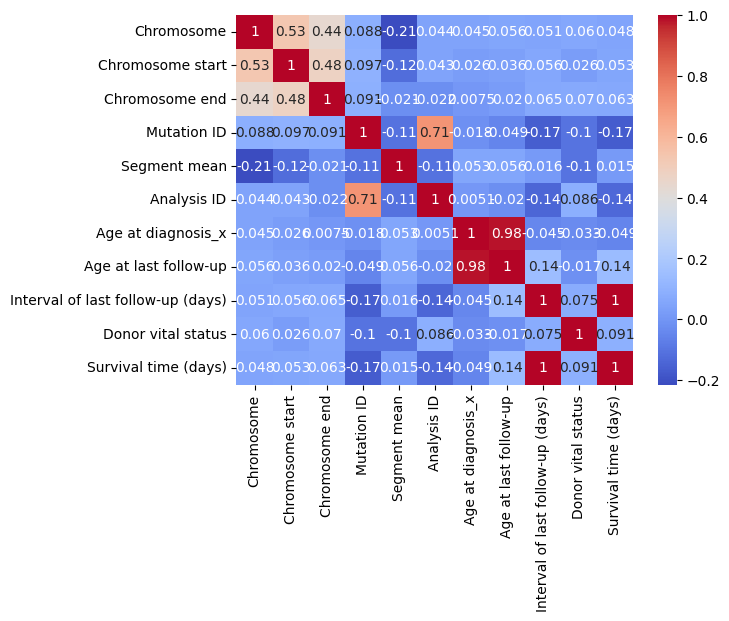

In [ ]:
# Exclure les colonnes non numériques
numerical_columns = df1.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
corr_matrix = numerical_columns.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# Régression

Le but est de prédire le nombre des jours de survie des patients

## Régession linéaire

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
# Remplacez les valeurs de la colonne 'Sex_x'
df['Sex_x'] = df['Sex_x'].replace({'female': 1, 'male': 0})

In [15]:
# Convertir le stade du cancer en un float pour entrainer le modèle aisemment
df['Donor tumour staging system at diagnosis'] = df['Donor tumour staging system at diagnosis'].str.extract('(\d+)').astype(float)

In [42]:
# Sélection des caractéristiques pertinentes
features = ['Sex_x','Chromosome','Chromosome start','Chromosome end','Mutation ID','Segment mean', 'Age at diagnosis_x','Age at last follow-up', 'Donor tumour staging system at diagnosis', 'Interval of last follow-up (days)']

In [43]:
# Sélection des caractéristiques pertinentes et de la variable cible
X = df[features]
y = df['Survival time (days)']

In [44]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Instancier le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

In [46]:
# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1978.5686203370697


Cela indique en général que notre modèle de régression linéaire a une certaine erreur dans ses prédictions.Ainsi, il faut améliorer le modèle en mettant en place plusieurs ajustements.

## Ajustement du modèle en enlevant les variables non significatives 

In [56]:
import statsmodels.api as sm

# Ajouter une colonne constante à la matrice de caractéristiques
X_with_const = sm.add_constant(X)

# Ajuster le modèle de régression linéaire multiple
model = sm.OLS(y, X_with_const).fit()

# Obtenir les résultats du test de Student pour chaque coefficient
t_test_results = model.summary().tables[1]

# Extraire les p-values des coefficients
p_values = model.pvalues[1:]  # Exclure la constante

# Identifier les indices des variables non significatives (p-value > seuil)
seuil = 0.05
non_significatives = p_values[p_values > seuil].index

# Supprimer les variables non significatives du modèle
X_filtre = X.drop(non_significatives, axis=1)

# Ajuster un nouveau modèle avec les variables filtrées
model_filtre = sm.OLS(y, sm.add_constant(X_filtre)).fit()

# Afficher les résultats du modèle filtré
print(model_filtre.summary())

                             OLS Regression Results                             
Dep. Variable:     Survival time (days)   R-squared:                       0.998
Model:                              OLS   Adj. R-squared:                  0.998
Method:                   Least Squares   F-statistic:                 5.104e+04
Date:                  Fri, 19 Apr 2024   Prob (F-statistic):          2.85e-305
Time:                          00:24:26   Log-Likelihood:                -1181.5
No. Observations:                   233   AIC:                             2369.
Df Residuals:                       230   BIC:                             2379.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Les résultats de la régression linéaire multiple (RLM) montrent un modèle ajusté avec un très bon ajustement aux données, avec un coefficient de détermination R² de 0,998. Cela signifie que le modèle explique près de 99,8 % de la variance dans le temps de survie des patients atteints de carcinome épidermoïde de la cavité buccale et du pharynx. L'ajustement du modèle a conduit à la suppression des variables non significatives, ce qui a amélioré la performance globale du modèle. 

Les coefficients de régression pour les variables significatives indiquent que chaque augmentation d'une unité dans la variable "Interval of last follow-up (days)" est associée à une augmentation moyenne de 1,0034 unité dans le temps de survie des patients. Les p-values associées à ces coefficients sont toutes deux significatives (p < 0,05), ce qui indique une relation statistiquement significative entre ces variables et le temps de survie.

## Transformation des caractéristiques et ajout de termes polynomiaux 

In [59]:
from sklearn.preprocessing import PolynomialFeatures

# Création de l'objet PolynomialFeatures pour ajouter des termes polynomiaux jusqu'au degré 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transformation des caractéristiques
X_poly = poly.fit_transform(X_filtre)

In [60]:
# Séparer les données en ensembles d'entraînement et de test
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Instancier le modèle de régression linéaire
model_poly = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement avec les caractéristiques polynomiales
model_poly.fit(X_train_poly, y_train)

# Prédire sur l'ensemble de test
y_pred_poly = model_poly.predict(X_test_poly)

# Calculer l'erreur quadratique moyenne pour le modèle avec les caractéristiques polynomiales
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error with Polynomial Features:", mse_poly)

Mean Squared Error with Polynomial Features: 1716.898984857758


In [ ]:
MSE a diminué en utilisant les données filtrées, càd après avoir enlevé les variables non significatives grace au test de Student.

## Réduction de la dimensionnalité avec l'analyse en composantes principales (PCA)

In [61]:
from sklearn.decomposition import PCA

# Création de l'objet PCA pour réduire les dimensions à 2
pca = PCA(n_components=2)

# Transformation des caractéristiques
X_pca = pca.fit_transform(X_filtre)

In [62]:
# Séparer les données en ensembles d'entraînement et de test
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Instancier le modèle de régression linéaire
model_pca = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement avec les caractéristiques réduites par PCA
model_pca.fit(X_train_pca, y_train)

# Prédire sur l'ensemble de test
y_pred_pca = model_pca.predict(X_test_pca)

# Calculer l'erreur quadratique moyenne pour le modèle avec les caractéristiques réduites par PCA
mse_pca = mean_squared_error(y_test, y_pred_pca)
print("Mean Squared Error with PCA Features:", mse_pca)

Mean Squared Error with PCA Features: 1742.333161839068


La MSE a diminué, mais il n'est pas aussi faible que dans le cas de la régression polynomiale

## Utilisation de la régression Ridge ou Lasso pour la régularisation 

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Création de l'objet Ridge pour la régression avec régularisation L2
ridge = Ridge(alpha=0.1)

# Entraînement du modèle Ridge
ridge.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_ridge = ridge.predict(X_test)

# Création de l'objet Lasso pour la régression avec régularisation L1
lasso = Lasso(alpha=0.1)

# Entraînement du modèle Lasso
lasso.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_lasso = lasso.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error

# Calculer l'erreur quadratique moyenne pour le modèle Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error for Ridge Regression:", mse_ridge)

# Calculer l'erreur quadratique moyenne pour le modèle Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error for Lasso Regression:", mse_lasso)

Mean Squared Error for Ridge Regression: 1978.8431099217223
Mean Squared Error for Lasso Regression: 2013.3766413934936


In [ ]:
On obtient des valeurs plus élevées par rapport à tous les modèles précédents.

## SVM 

In [28]:
# L'importation d'un search vector regressor
from sklearn.svm import SVR

In [65]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_filtre, y, test_size=0.2, random_state=42)

### Noyau linéaire

In [66]:
# Instanciation du modèle SVM pour la régression
svm_regressor = SVR(kernel='linear')

In [67]:
# Entraînement du modèle
svm_regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = svm_regressor.predict(X_test)

In [68]:
# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for SVM Regression:", mse)

Mean Squared Error for SVM Regression: 1905.6136443092141


Dans ce cas particulier, la régression polynomiale établie sur des données filtrées semble être le meilleur modèle en termes de MSE.

# Classification

Le but est de classifier nos données afin de déterminer le statut vital du patient(Ce dernier prend la valeur 1 pour vivant, 0 pour non)

In [76]:
y = df['Donor vital status']

## SVM

In [78]:
# L'importation d'un search vector classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [79]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_filtre, y, test_size=0.2, random_state=42)

# Créer un modèle SVM
svm_model = SVC(kernel='linear', random_state=42)

# Entraîner le modèle sur les données d'entraînement
svm_model.fit(X_train, y_train)

# Prédire les classes sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8723404255319149
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.87      1.00      0.93        41

    accuracy                           0.87        47
   macro avg       0.44      0.50      0.47        47
weighted avg       0.76      0.87      0.81        47



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


l'accuracy est de 0.87, ce qui signifie que le modèle prédit correctement le statut vital des donneurs dans environ 87% des cas.
Le modèle SVM a une bonne capacité à prédire le statut vital des donneurs pour la classe 1 (vivant), mais il échoue à prédire correctement la classe 0 (mort).

## Arbre de décision

In [80]:
from sklearn.tree import DecisionTreeClassifier

# Créer un modèle d'arbre de décision
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle sur les données d'entraînement
decision_tree_model.fit(X_train, y_train)

# Prédire les classes sur l'ensemble de test
y_pred = decision_tree_model.predict(X_test)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7872340425531915
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         6
           1       0.94      0.80      0.87        41

    accuracy                           0.79        47
   macro avg       0.64      0.74      0.66        47
weighted avg       0.87      0.79      0.81        47



Le modèle identifie correctement environ 67% des exemples de la classe 0 et 80% des exemples de la classe 1.

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Créer le modèle de forêt aléatoire
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_classifier.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7872340425531915
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         6
           1       0.94      0.80      0.87        41

    accuracy                           0.79        47
   macro avg       0.64      0.74      0.66        47
weighted avg       0.87      0.79      0.81        47



Bien que la précision pour la classe 0(mort) soit relativement faible, le modèle présente une bonne précision et un bon rappel pour la classe 1(vivant)

## K-Nearest Neighbors

In [84]:
from sklearn.neighbors import KNeighborsClassifier

# Création du classifieur KNN avec k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Entraînement du classifieur
knn.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8085106382978723
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      0.93      0.89        41

    accuracy                           0.81        47
   macro avg       0.43      0.46      0.45        47
weighted avg       0.75      0.81      0.78        47



Le modèle a bien performé pour la classe 1 ("alive"), mais a eu des difficultés à prédire la classe 0 ("dead")

Le meilleur modèle en termes de précision s'avère SVM sur des donées filtrées